
**Description of attributes:**

sex: sex (1 = male; 0 = female)

ca = number of major vessels (0-3) colored by flourosopy

restbps: resting blood pressure (in mm Hg on admission to the hospital)

chol: serum cholestoral in mg/dl

fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

restecg: resting electrocardiographic results

-- Value 0: normal

-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

-- Value 2: showing probable or definite left ventricular hypertrophy
by Estes' criteria

thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
exang: exercise induced angina (1 = yes; 0 = no)

oldpeak = ST depression induced by exercise relative to rest

slope: the slope of the peak exercise ST segment
-- Value 1: upsloping
-- Value 2: flat
-- Value 3: downsloping

maxHR = maximum heart rate

thal: the heart status as retrieved from 

Thallium test, (normal, fixed defect, reversible defect) (discrete)

ahd-atherosclerotic heart disease

**Install all required librarys**




In [1]:
%pip install sklearn
%pip install seaborn
%pip install matplotlib
%pip install pandas
%pip install numpy


**Data Preprocessing and EDA**

In [2]:
# mounting 
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
import io
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv('heart.csv')

In [4]:
df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [5]:
print(df.shape)
print(df.columns)
print(df.dtypes)

(303, 15)
Index(['Unnamed: 0', 'Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs',
       'RestECG', 'MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'AHD'],
      dtype='object')
Unnamed: 0      int64
Age             int64
Sex             int64
ChestPain      object
RestBP          int64
Chol            int64
Fbs             int64
RestECG         int64
MaxHR           int64
ExAng           int64
Oldpeak       float64
Slope           int64
Ca            float64
Thal           object
AHD            object
dtype: object


In [6]:
pd.set_option("display.float", "{:.2f}".format)
df.describe()

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,299.00
mean,152.00,54.44,0.68,131.69,246.69,0.15,0.99,149.61,0.33,1.04,1.60,0.67
std,87.61,9.04,0.47,17.60,51.78,0.36,0.99,22.88,0.47,1.16,0.62,0.94
min,1.00,29.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,1.00,0.00
25%,76.50,48.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00
50%,152.00,56.00,1.00,130.00,241.00,0.00,1.00,153.00,0.00,0.80,2.00,0.00
75%,227.50,61.00,1.00,140.00,275.00,0.00,2.00,166.00,1.00,1.60,2.00,1.00
max,303.00,77.00,1.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,3.00,3.00


Used to manipulate nan values

df.fillna(0)

df.replace(np.nan,0)

In [7]:
df.isna().sum()

Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            4
Thal          2
AHD           0
dtype: int64

In [8]:
print(df["Ca"].unique())
print(df["Thal"].unique())

[ 0.  3.  2.  1. nan]
['fixed' 'normal' 'reversable' nan]


In [9]:

df['Ca']=df["Ca"].replace(np.nan,1)
df=df.dropna()
df.isna().sum()

Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            0
Thal          0
AHD           0
dtype: int64

In [10]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.30,3,0.00,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.50,2,3.00,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.60,2,2.00,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.50,3,0.00,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.40,1,0.00,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,typical,110,264,0,0,132,0,1.20,2,0.00,reversable,Yes
299,68,1,asymptomatic,144,193,1,0,141,0,3.40,2,2.00,reversable,Yes
300,57,1,asymptomatic,130,131,0,0,115,1,1.20,2,1.00,reversable,Yes
301,57,0,nontypical,130,236,0,2,174,0,0.00,2,1.00,normal,Yes


In [11]:
df["disease"]=pd.get_dummies(df["AHD"], drop_first=True)
df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD,disease
0,63,1,typical,145,233,1,2,150,0,2.30,3,0.00,fixed,No,0
1,67,1,asymptomatic,160,286,0,2,108,1,1.50,2,3.00,normal,Yes,1
2,67,1,asymptomatic,120,229,0,2,129,1,2.60,2,2.00,reversable,Yes,1
3,37,1,nonanginal,130,250,0,0,187,0,3.50,3,0.00,normal,No,0
4,41,0,nontypical,130,204,0,2,172,0,1.40,1,0.00,normal,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,typical,110,264,0,0,132,0,1.20,2,0.00,reversable,Yes,1
299,68,1,asymptomatic,144,193,1,0,141,0,3.40,2,2.00,reversable,Yes,1
300,57,1,asymptomatic,130,131,0,0,115,1,1.20,2,1.00,reversable,Yes,1
301,57,0,nontypical,130,236,0,2,174,0,0.00,2,1.00,normal,Yes,1


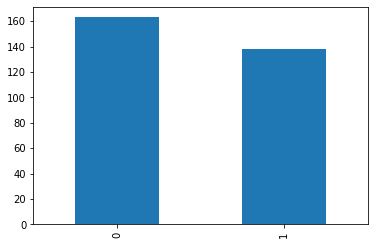

In [12]:
df["disease"].value_counts().plot(kind="bar")

In [13]:
df.drop("AHD",inplace=True,axis=1)
df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,disease
0,63,1,typical,145,233,1,2,150,0,2.30,3,0.00,fixed,0
1,67,1,asymptomatic,160,286,0,2,108,1,1.50,2,3.00,normal,1
2,67,1,asymptomatic,120,229,0,2,129,1,2.60,2,2.00,reversable,1
3,37,1,nonanginal,130,250,0,0,187,0,3.50,3,0.00,normal,0
4,41,0,nontypical,130,204,0,2,172,0,1.40,1,0.00,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,typical,110,264,0,0,132,0,1.20,2,0.00,reversable,1
299,68,1,asymptomatic,144,193,1,0,141,0,3.40,2,2.00,reversable,1
300,57,1,asymptomatic,130,131,0,0,115,1,1.20,2,1.00,reversable,1
301,57,0,nontypical,130,236,0,2,174,0,0.00,2,1.00,normal,1


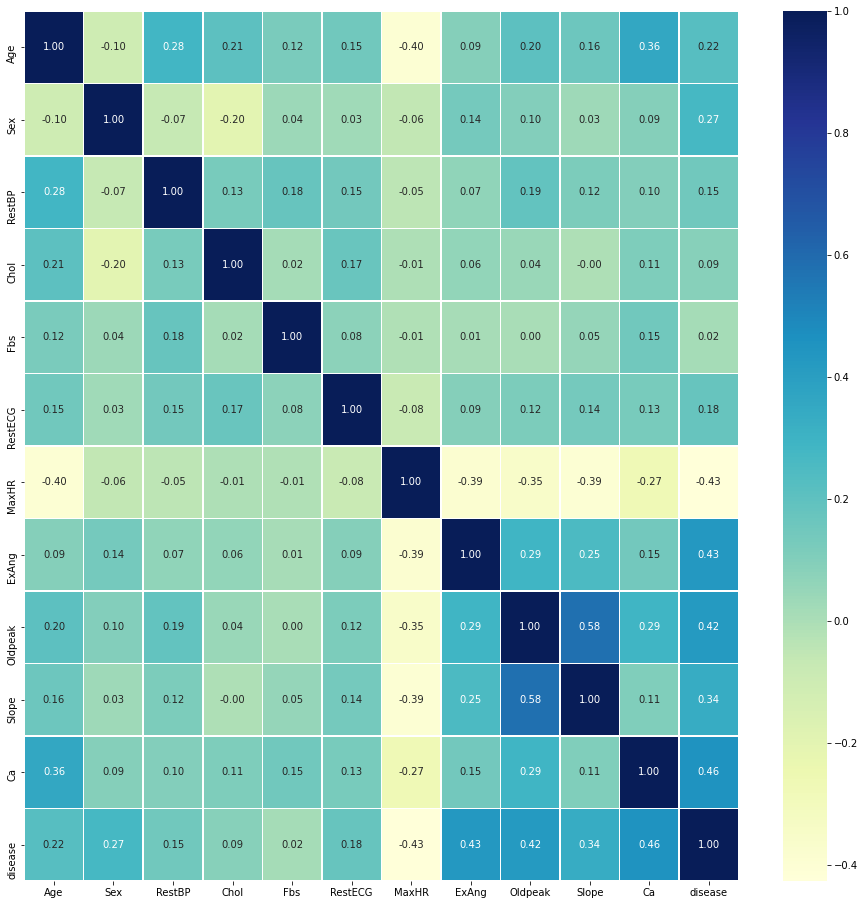

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix=df.corr()
plt.figure(figsize = (16,16))
ax=sns.heatmap(corr_matrix,
               annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")


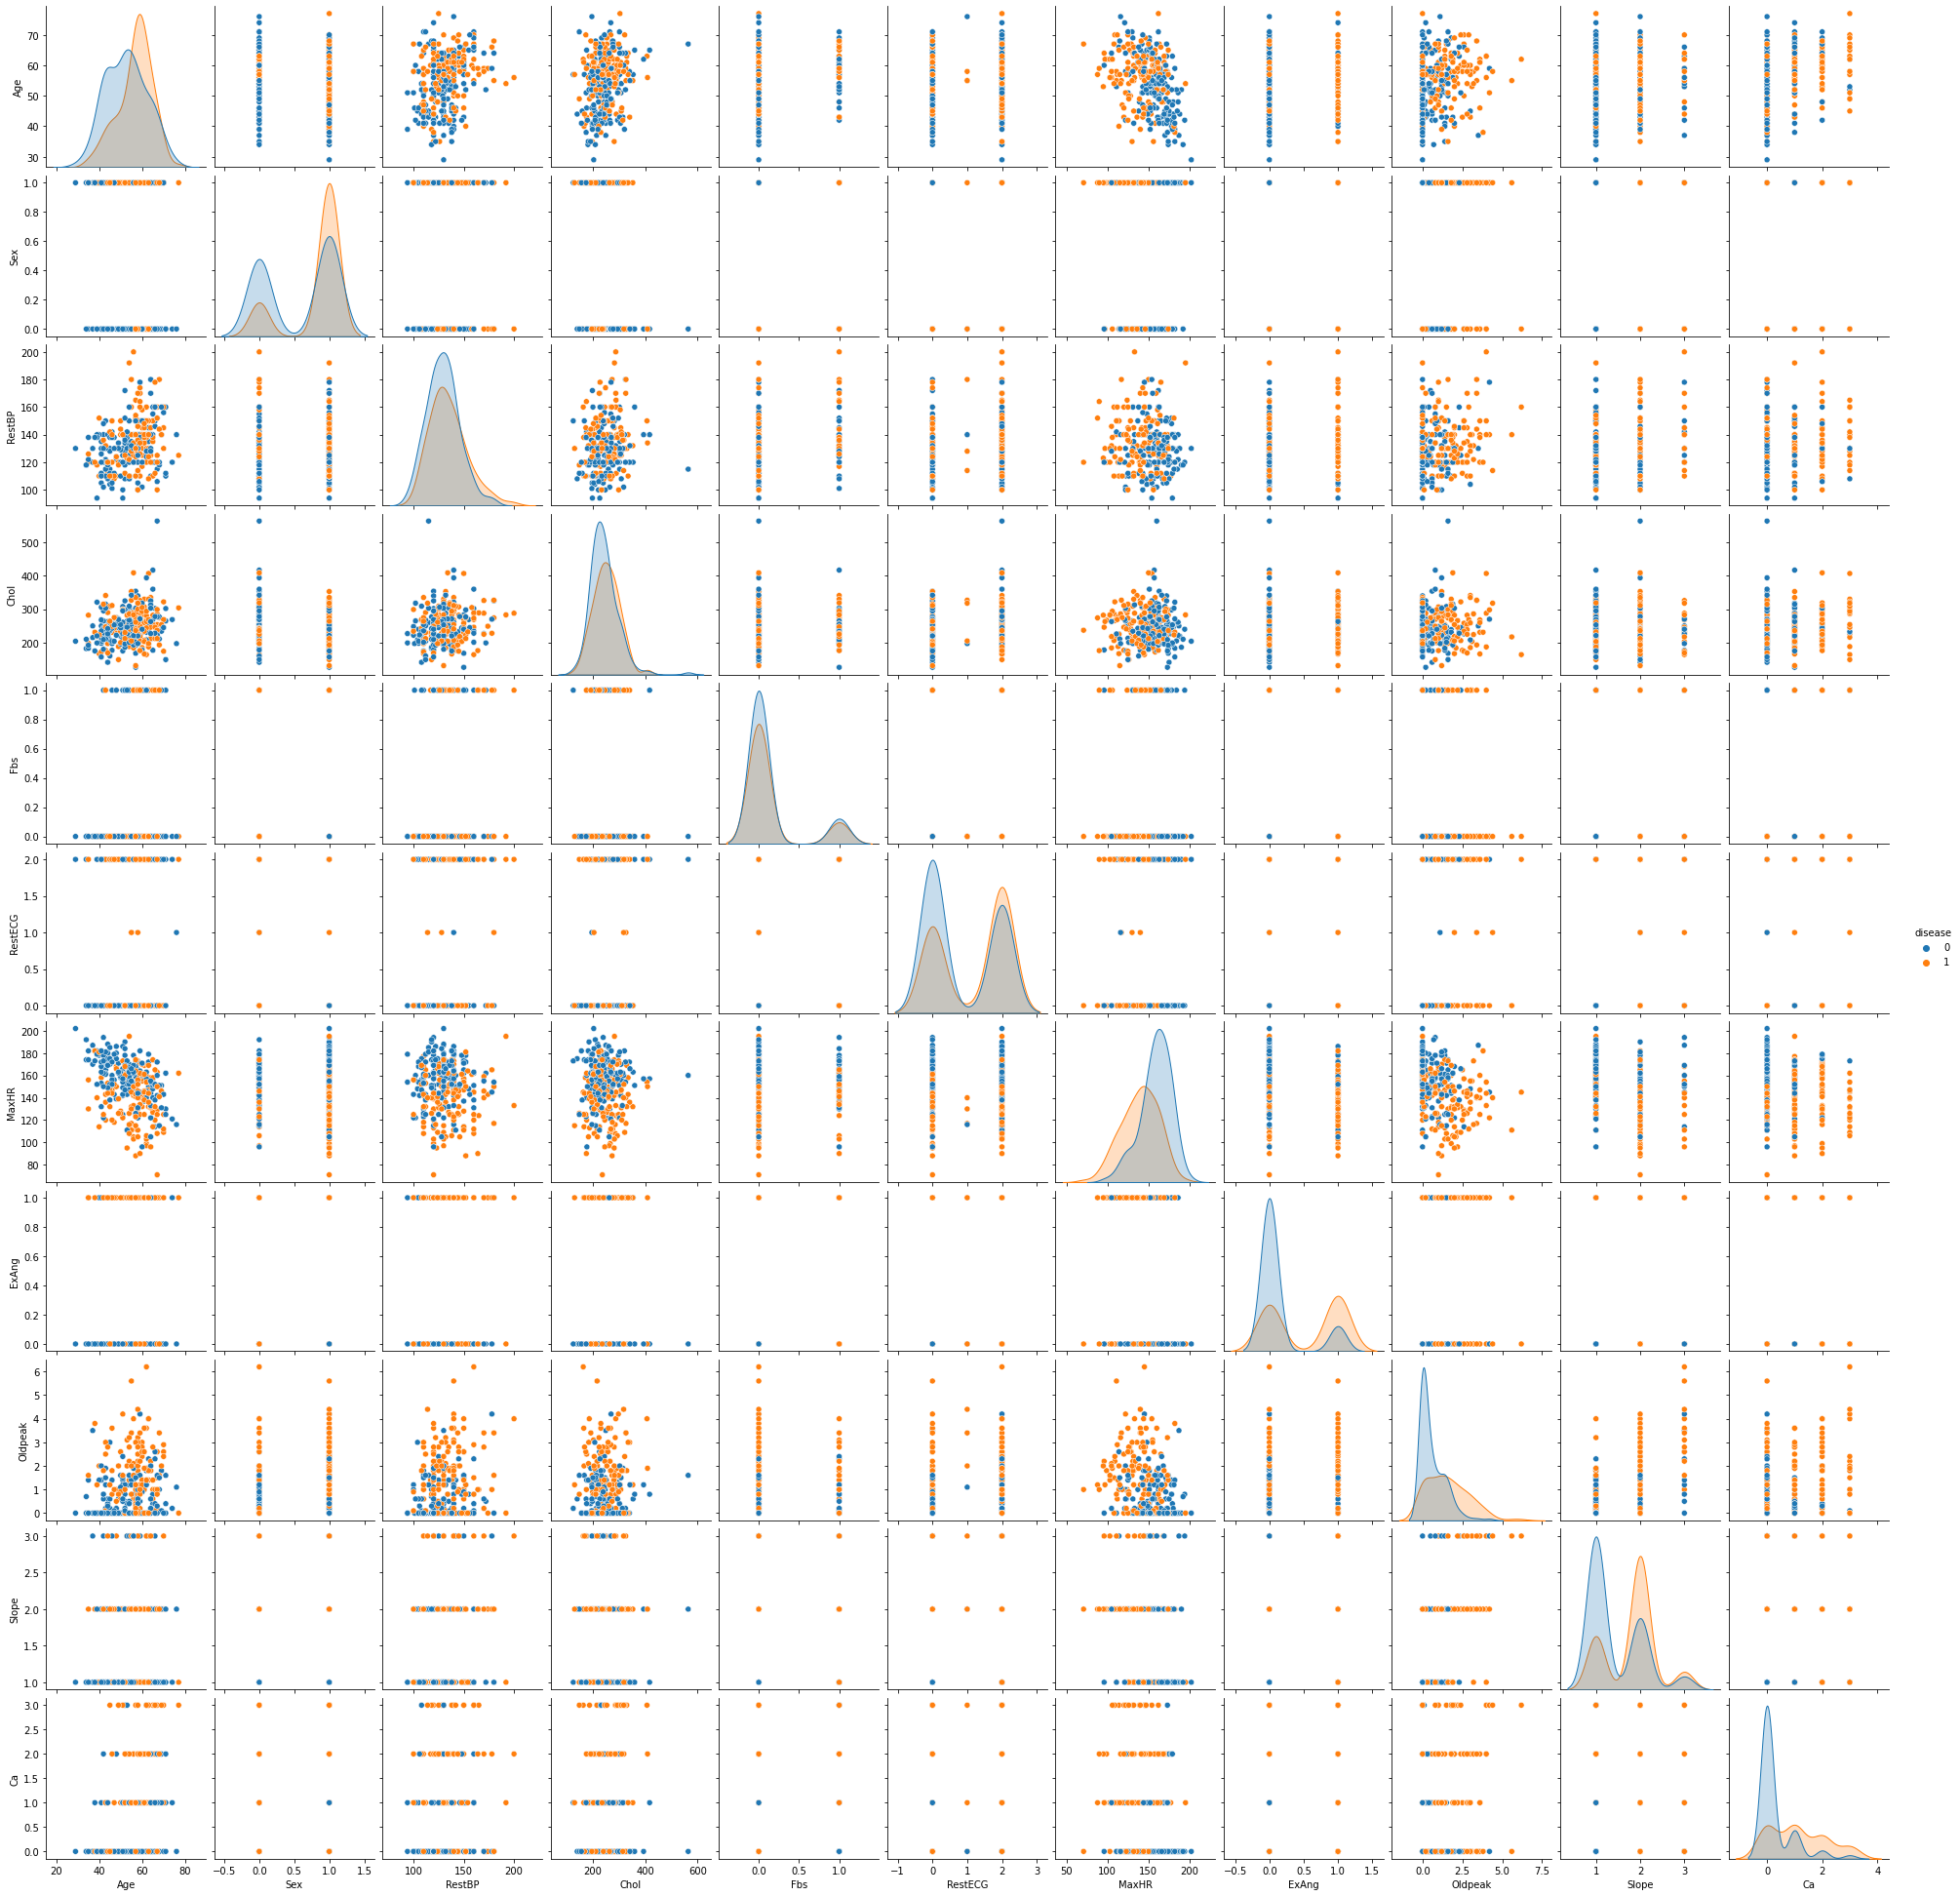

In [15]:
sns.pairplot(df,hue="disease")

In [16]:
cat_val=[]
cont_val=[]

for column in df.columns:
  print('*'*70)
  print(f"{column}:{df[column].unique()}")

  if len(df[column].unique())<=10:
    cat_val.append(column)
  else:
    cont_val.append(column)

print(f"categorical columns:{cat_val}")
print(f"Continuous columns:{cont_val}")

**********************************************************************
Age:[63 67 37 41 56 62 57 53 44 52 48 54 49 64 58 60 50 66 43 40 69 59 42 55
 61 65 71 51 46 45 39 68 47 34 35 29 70 77 38 74 76]
**********************************************************************
Sex:[1 0]
**********************************************************************
ChestPain:['typical' 'asymptomatic' 'nonanginal' 'nontypical']
**********************************************************************
RestBP:[145 160 120 130 140 172 150 110 132 117 135 112 105 124 125 142 128 170
 155 104 180 138 108 134 122 115 118 100 200  94 165 102 152 101 126 174
 148 178 158 192 129 144 123 136 146 106 156 154 114 164]
**********************************************************************
Chol:[233 286 229 250 204 236 268 354 254 203 192 294 256 263 199 168 239 275
 266 211 283 284 224 206 219 340 226 247 167 230 335 234 177 276 353 243
 225 302 212 330 175 417 197 198 290 253 172 273 213 305 216 304 188 282
 185 23

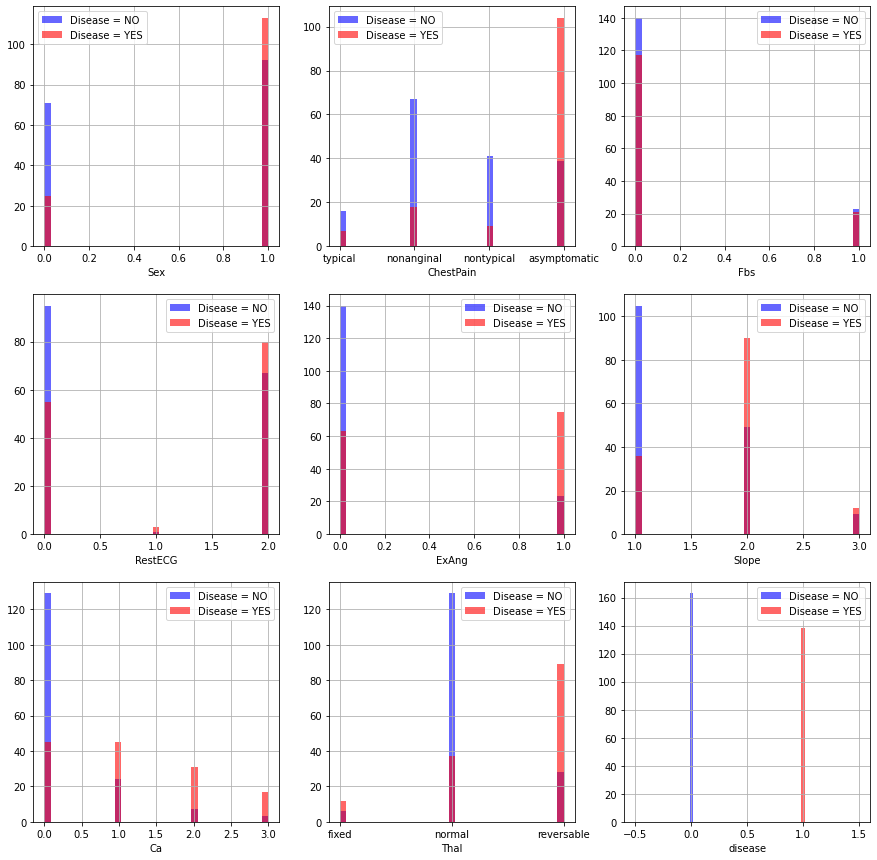

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))

for i,column in enumerate(cat_val, 1):
    plt.subplot(3, 3, i)
    df[df["disease"] == 0][column].hist(bins=35, color='blue', label='Disease = NO', alpha=0.6)
    df[df["disease"] == 1][column].hist(bins=35, color='red', label='Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

# We are trying to plot graph for different column value in a column is there disease present or not

**Observations from the above plot:**

Males are more likely to have heart disease as compared to females. 

Chest pain: People with asymptomatic chest pain have greate chance of getting disease.


fbs: (fasting blood sugar) does not contribute much to result as 
when value of
fbs=1 -> No diease 
fbs=0 -> No diease

restecg {resting ECG results}:As the value of restecg increases from 0 to 2 the chances of disease also increase.


exang {exercise-induced angina}: people with exang value of 0 (No disease)
 people with exang value of 1 (disease) 


slope {the slope of the ST segment of peak exercise}: People with a slope value of 2  are more likely to have heart disease than people with a slope value of 1.


ca {number of major vessels (0-3) stained by fluoroscopy}: the more blood movement the better, so people with ca equal to 0 are more likely to have heart disease.


thal {thalium stress result}: People with a thal value of 2 are more likely to have heart disease.





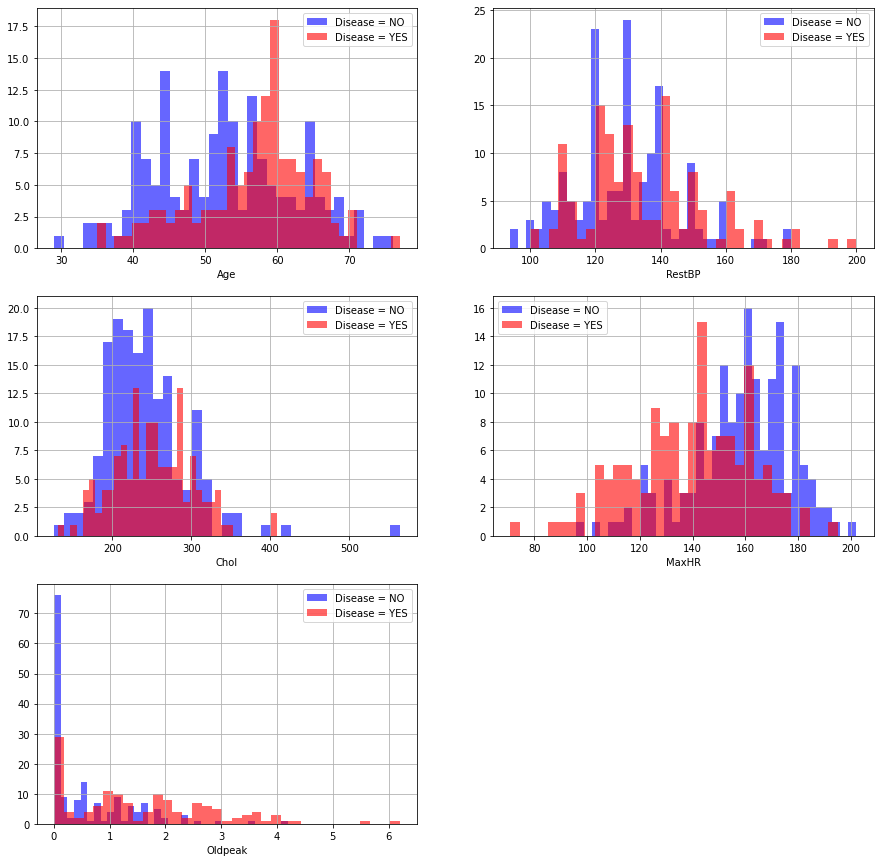

In [18]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(cont_val, 1):
    plt.subplot(3, 2, i)
    df[df["disease"] == 0][column].hist(bins=35, color='blue', label='Disease = NO', alpha=0.6)
    df[df["disease"] == 1][column].hist(bins=35, color='red', label='Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

Observations from the above plot:

Restbp: resting blood pressure anything above 120-180 is generally of concern


chol: greater than 200 is of concern.


MaxHR: People with a maxHR between 80-140 are more likely to have heart disease.


Increasing value of oldpeak from 0 to 4 is of cocern 


In [19]:
thal=pd.get_dummies(df["Thal"])
chestpain=pd.get_dummies(df["ChestPain"])
df1=pd.concat([df,thal,chestpain], axis=1)
df1.drop(["Thal","ChestPain"],axis=1,inplace=True)
df1.head()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,disease,fixed,normal,reversable,asymptomatic,nonanginal,nontypical,typical
0,63,1,145,233,1,2,150,0,2.30,3,0.00,0,1,0,0,0,0,0,1
1,67,1,160,286,0,2,108,1,1.50,2,3.00,1,0,1,0,1,0,0,0
2,67,1,120,229,0,2,129,1,2.60,2,2.00,1,0,0,1,1,0,0,0
3,37,1,130,250,0,0,187,0,3.50,3,0.00,0,0,1,0,0,1,0,0
4,41,0,130,204,0,2,172,0,1.40,1,0.00,0,0,1,0,0,0,1,0


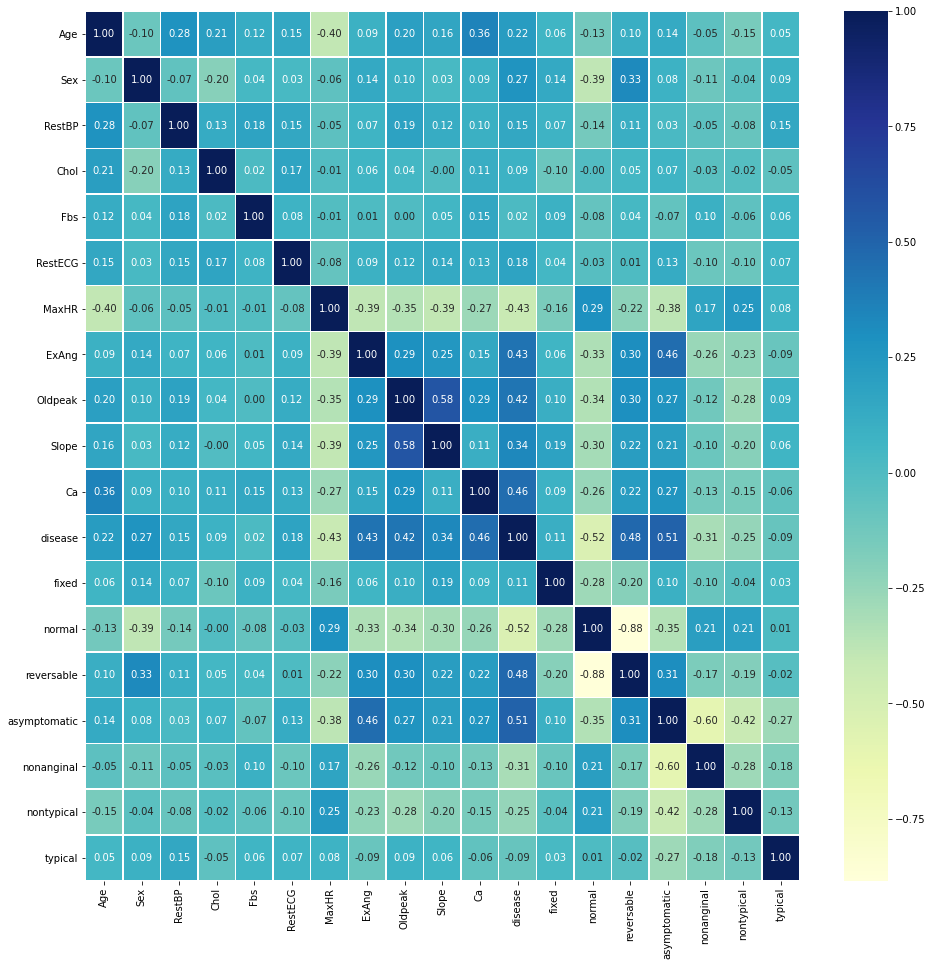

In [20]:
corr_matrix=df1.corr()
plt.figure(figsize = (16,16))
ax=sns.heatmap(corr_matrix,
               annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

In [21]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
df1[cont_val]=scale.fit_transform(df1[cont_val])
df1["Ca"].dropna()
df1

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,disease,fixed,normal,reversable,asymptomatic,nonanginal,nontypical,typical
0,0.94,1,0.75,-0.27,1,2,0.01,0,1.08,3,0.00,0,1,0,0,0,0,0,1
1,1.39,1,1.60,0.75,0,2,-1.83,1,0.39,2,3.00,1,0,1,0,1,0,0,0
2,1.39,1,-0.66,-0.35,0,2,-0.91,1,1.34,2,2.00,1,0,0,1,1,0,0,0
3,-1.93,1,-0.10,0.06,0,0,1.63,0,2.12,3,0.00,0,0,1,0,0,1,0,0
4,-1.49,0,-0.10,-0.83,0,2,0.98,0,0.31,1,0.00,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,-1.04,1,-1.23,0.33,0,0,-0.78,0,0.14,2,0.00,1,0,0,1,0,0,0,1
299,1.50,1,0.70,-1.04,1,0,-0.38,0,2.03,2,2.00,1,0,0,1,1,0,0,0
300,0.28,1,-0.10,-2.24,0,0,-1.52,1,0.14,2,1.00,1,0,0,1,1,0,0,0
301,0.28,0,-0.10,-0.21,0,2,1.06,0,-0.90,2,1.00,1,0,1,0,0,0,1,0


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
x=df1.drop("disease", axis=1)
y=df1["disease"]

Xtrain,Xtest,Ytrain,Ytest=train_test_split(x,y,test_size=0.2, random_state=0)


In [23]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(Xtrain, Ytrain)

train_score=accuracy_score(Ytrain,lr.predict(Xtrain))

print(f"Traning score:{train_score} and confusion matrix is \n {confusion_matrix(Ytrain,lr.predict(Xtrain))}")

test_score=accuracy_score(Ytest,lr.predict(Xtest))
print(f"Testing score:{test_score} and confusion matrix is \n {confusion_matrix(Ytest,lr.predict(Xtest))}")

Traning score:0.8666666666666667 and confusion matrix is 
 [[118  11]
 [ 21  90]]
Testing score:0.8688524590163934 and confusion matrix is 
 [[31  3]
 [ 5 22]]


In [24]:
#Training model based on selected features ((feature selection based on heatmap corelation))
print(df1.columns)
x=df1[[ 'MaxHR', 'ExAng','Oldpeak', 'Slope', 'Ca', 'normal', 'reversable','asymptomatic']]
y=df1["disease"]
Xtrain,Xtest,Ytrain,Ytest=train_test_split(x,y,test_size=0.2, random_state=0)

lr = LogisticRegression()
lr.fit(Xtrain, Ytrain)

train_score=accuracy_score(Ytrain,lr.predict(Xtrain))

print(f"Traning score:{train_score} and confusion matrix is \n {confusion_matrix(Ytrain,lr.predict(Xtrain))}")

test_score=accuracy_score(Ytest,lr.predict(Xtest))
print(f"Testing score:{test_score} and confusion matrix is \n {confusion_matrix(Ytest,lr.predict(Xtest))}")

Index(['Age', 'Sex', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR', 'ExAng',
       'Oldpeak', 'Slope', 'Ca', 'disease', 'fixed', 'normal', 'reversable',
       'asymptomatic', 'nonanginal', 'nontypical', 'typical'],
      dtype='object')
Traning score:0.8458333333333333 and confusion matrix is 
 [[115  14]
 [ 23  88]]
Testing score:0.8688524590163934 and confusion matrix is 
 [[31  3]
 [ 5 22]]


In [25]:
#principal component Analysis
from sklearn.decomposition import PCA
df1['disease'].replace("True", 1,inplace=True)
df1['disease'].replace("False",0,inplace=True)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
print(principalComponents.shape)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])


#explained_variance_ratio will provide you with the amount of information or variance each principal component holds after projecting the data to a lower dimensional subspace.
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))


(301, 2)
Explained variation per principal component: [0.44359505 0.17029559]


we can observe that the principal component 1 holds 99% of the information while the principal component 2 holds only .02% of the information.

In [26]:
from sklearn.linear_model import LogisticRegression
Xtrain,Xtest,Ytrain,Ytest=train_test_split(x,y,test_size=0.2, random_state=0)
pca = PCA(n_components=6)
X_train = pca.fit_transform(Xtrain)
Y_train = Ytrain
lr = LogisticRegression()
lr.fit(X_train, Y_train)

train_score=accuracy_score(Y_train,lr.predict(X_train))

print(f"Traning score:{train_score} and confusion matrix is \n {confusion_matrix(Y_train,lr.predict(X_train))}")


Traning score:0.8458333333333333 and confusion matrix is 
 [[115  14]
 [ 23  88]]


Accuarcy:81.9672131147541 and confusion matrix is 
 [[29  5]
 [ 6 21]]




/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


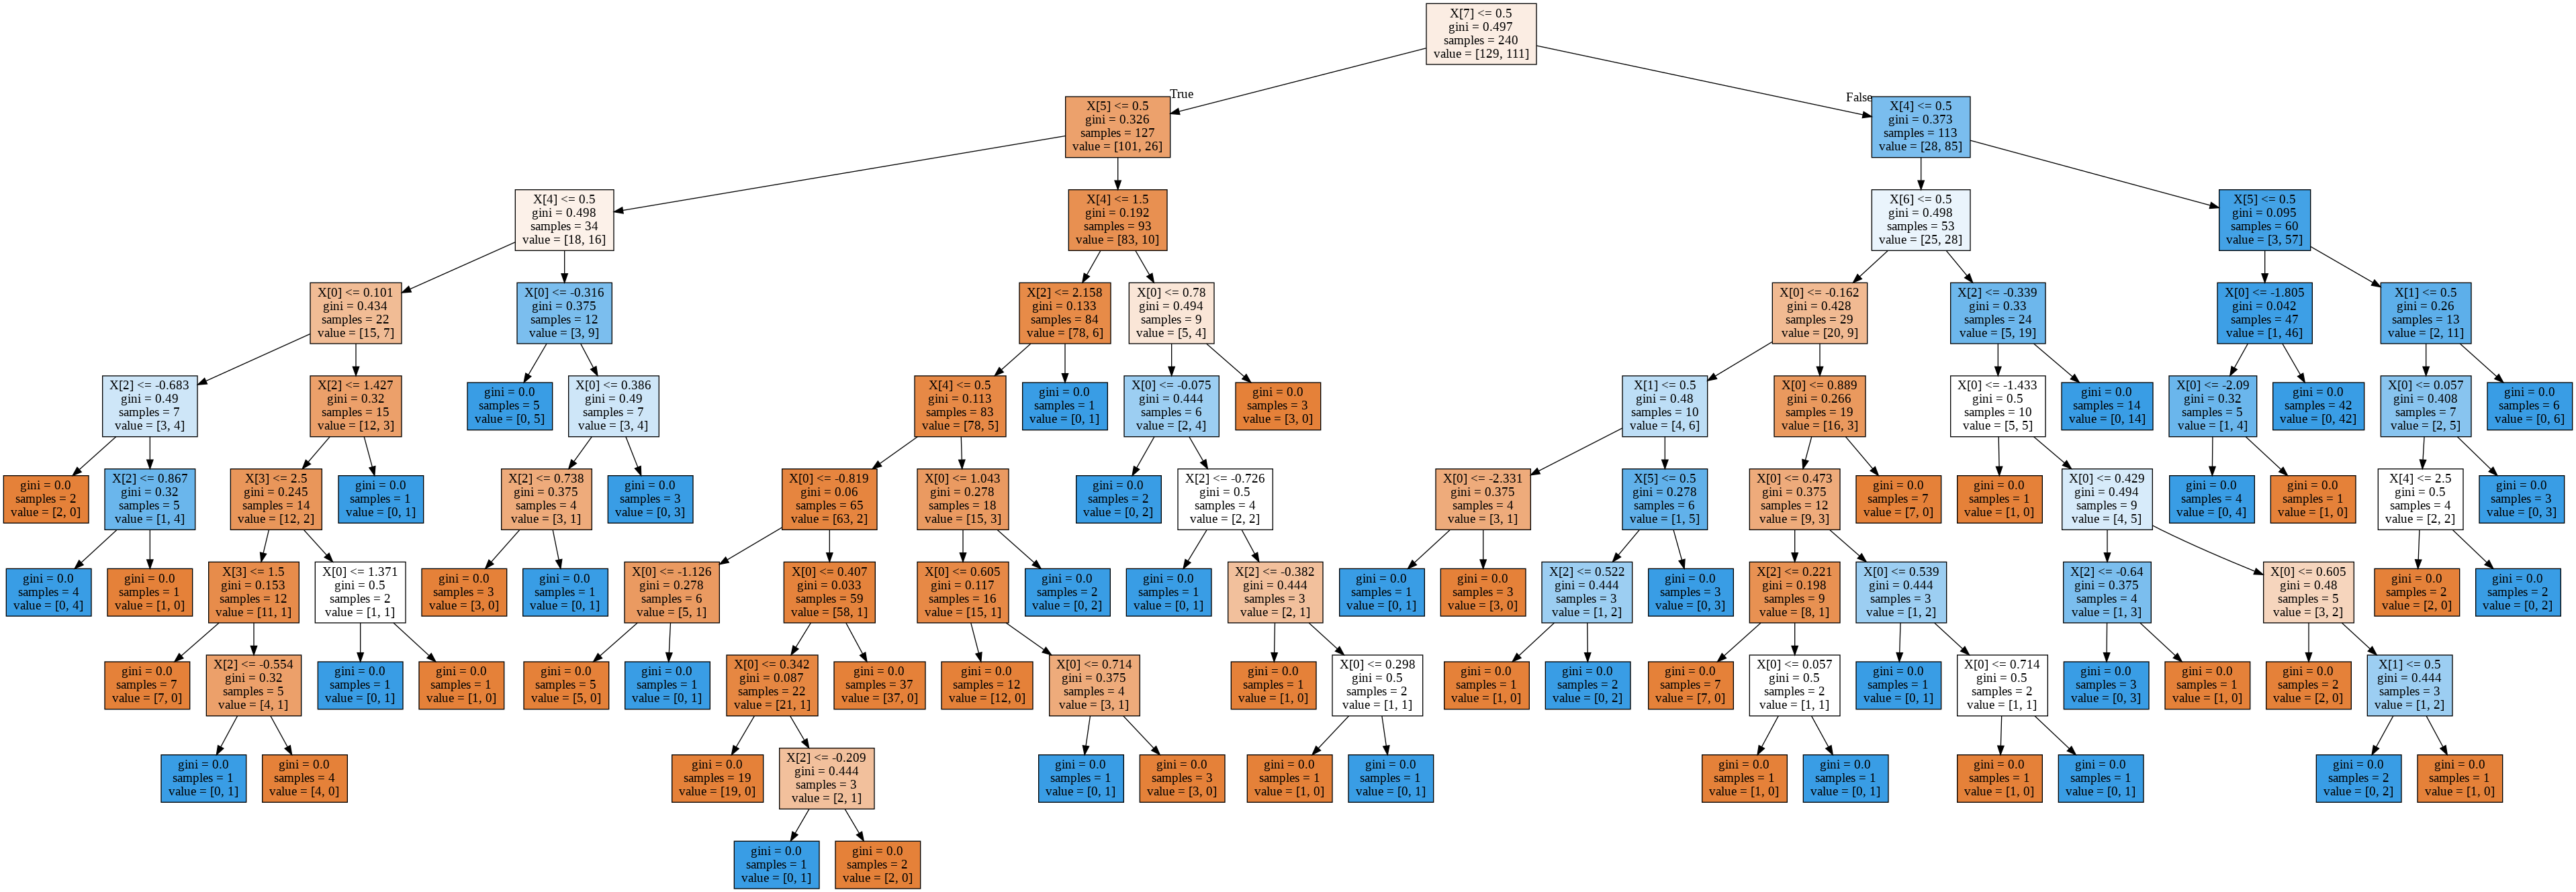

In [27]:
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.externals.six import StringIO
clf = DecisionTreeClassifier()

clf = clf.fit(Xtrain,Ytrain)
y_pred = clf.predict(Xtest)
print(f"Accuarcy:{accuracy_score(Ytest,y_pred)*100} and confusion matrix is \n {confusion_matrix(Ytest,y_pred)}\n\n")

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

export_graphviz function converts decision tree classifier into dot file and pydotplus convert this dot file to png or displayable form on Jupyter

In [28]:
#hyper parameter tunning for decision tree
from sklearn.model_selection import RandomizedSearchCV
import pickle

para_dist={
 "max_depth":[3,4,5,None],
 "max_features":[1,2,3,4,5,6,7],
 "min_samples_leaf": [1,2,3,4,5,6,7],
 "criterion": ["gini", "entropy"]
}
tree=DecisionTreeClassifier(random_state=0)
tree_cv=RandomizedSearchCV(tree,para_dist,cv=5)
tree_cv.fit(Xtrain,Ytrain)
print(f"Tuned Decision Tree Parameters: {tree_cv.best_params_}")
print(f"Best score is {tree_cv.best_score_}")

filename="heart.pkl"
with open(filename, 'wb') as file:
  pickle.dump(tree_cv, file)
file.close()


Tuned Decision Tree Parameters: {'min_samples_leaf': 4, 'max_features': 2, 'max_depth': 3, 'criterion': 'entropy'}
Best score is 0.8


In [29]:
Xtrain.columns

Index(['MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'Ca', 'normal', 'reversable',
       'asymptomatic'],
      dtype='object')

In [30]:
!pip install flask_ngrok

In [41]:
import pickle
from flask import Flask,render_template,request,redirect,url_for
from flask_ngrok import run_with_ngrok

labels=['MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'Ca','thal','asymptomatic']
values=[]

app = Flask(__name__, template_folder='/')
run_with_ngrok(app)  

model = pickle.load(open("/content/heart.pkl", "rb"))



@app.route("/")
def home():
    return render_template("/content/index_heart.html")




@app.route("/predict", methods = ["GET", "POST"])
def predict():
    if request.method == "POST":
      for element in labels:
        if element=="Oldpeak":
          values.append(float(request.form["Oldpeak"]))
        elif element=="thal":
          val=request.form["thal"].split( )
          va=[int(element) for element in val]
          values.extend(va)
        else:
          values.append(int(request.form[element]))

      ans=model.predict([values])
      
      if ans==1:
        result="The patient is going to have a heart disease"
      else:
        result="The patient is not going to have heart disease"
      
      return render_template("/content/index_heart.html",result=result)


app.run()


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://8b3d214a3562.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [28/May/2021 09:01:47] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [28/May/2021 09:01:47] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [28/May/2021 09:02:00] "POST /predict HTTP/1.1" 200 -


In [36]:
a='1 0'
a.split( )

['1', '0']